In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! pip install deepface

     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 2.3MB 5.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=3648565c52c1b533f85171605853b5eee5bc19ed84cc2c9bf729a62d96a9c6e4
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [5]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from deepface import DeepFace
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
model_path = Path('/content/drive/MyDrive/FacialAge/Model_linear')
model = load_model(model_path/'MobileNetV3Large')

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [8]:
groups_names= ['Children', 'Teenage', 'Youth', 'Middle', 'Old']
def predict_class(age):
  if age <= 10: return groups_names[0] #Children 0 - 10
  if age <= 18: return groups_names[1] #Teenage 10 - 18
  if age <= 34: return groups_names[2] #Youth   19 - 34
  if age <= 60: return groups_names[3] #Middle  35 - 60
  return groups_names[4]               #Old     61+

In [9]:
def preprocess_image(data):
    image = Image.fromarray(data, 'RGB')
    image = image.resize((224,224))
    image = np.array(image)
    image = np.expand_dims(image, axis = 0)
    return image

In [10]:
def detect_face(img_path):
    backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']
    detected_face = DeepFace.detectFace( img_path , detector_backend=backends[2])
    return detected_face

In [11]:
def predict_age(image):
    input = preprocess_image(image)
    result = model.predict(input)
    return int(result), predict_class(result)

In [22]:
test_path = '/content/drive/MyDrive/FacialAge/Test_case/testcase6-25tuoi.png'
detected_face = detect_face(test_path)
input = preprocess_image(detected_face)
age = model.predict(input)
text = 'Age: '+ str(int(age)) + ' - '+ str(predict_class(age))

Text(0.5, 1.0, 'Age: 15 - Teenage')

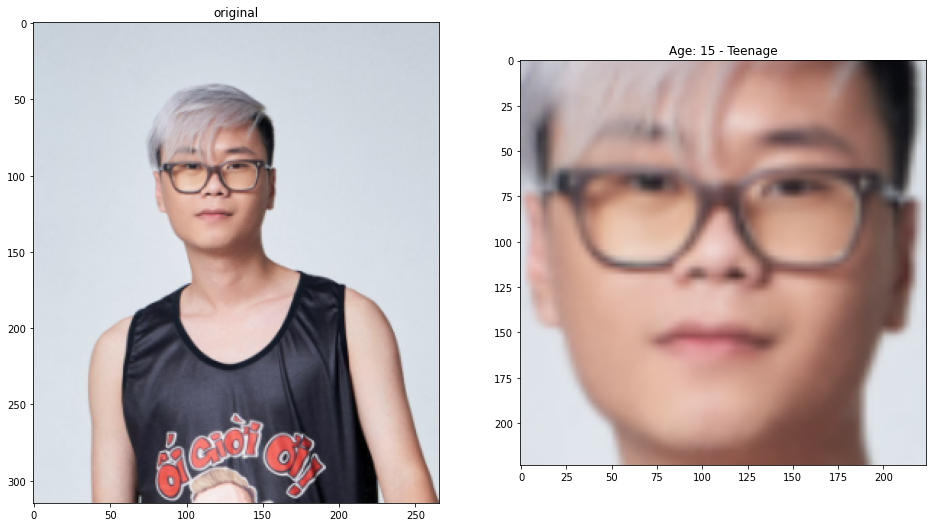

In [23]:
plt.figure(figsize=(16,9))

ax = plt.subplot(1, 2, 1)
plt.imshow(mpimg.imread(test_path))
plt.title('original')

ax = plt.subplot(1, 2, 2)
plt.imshow(detected_face)
plt.title(text)